# 2. Get the Data

In [1]:
# Download the data

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")

    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["longitude"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: longitude
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [5]:
housing["longitude"].value_counts()

-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-115.94      1
-116.08      1
-123.50      1
-114.66      1
-114.63      1
Name: longitude, Length: 844, dtype: int64

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing["housing_median_age"].median()

29.0

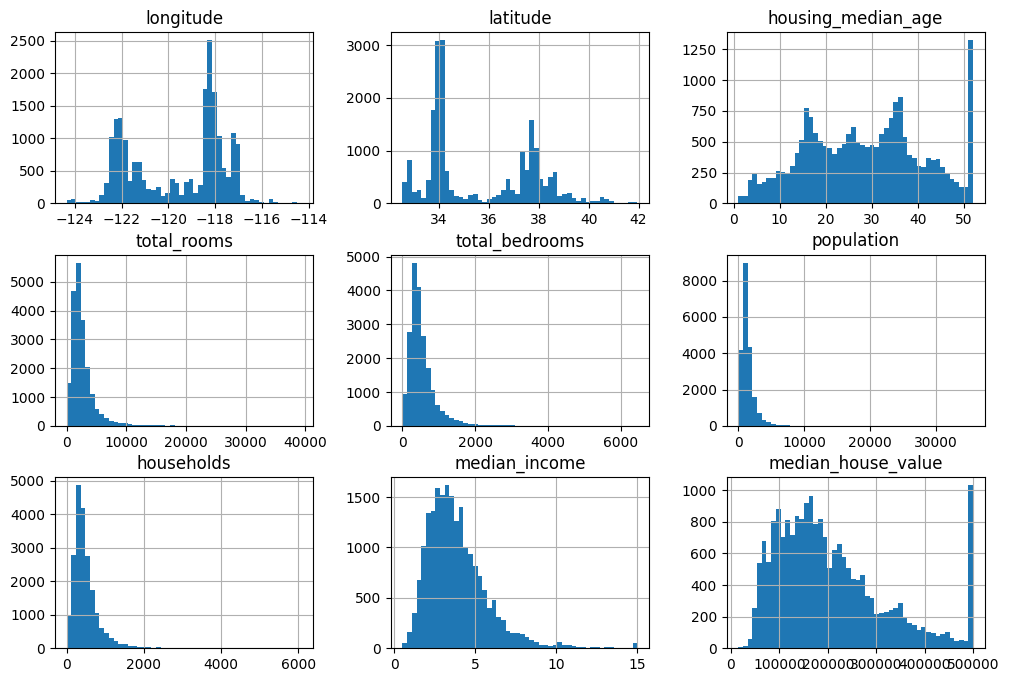

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12, 8))
plt.show()

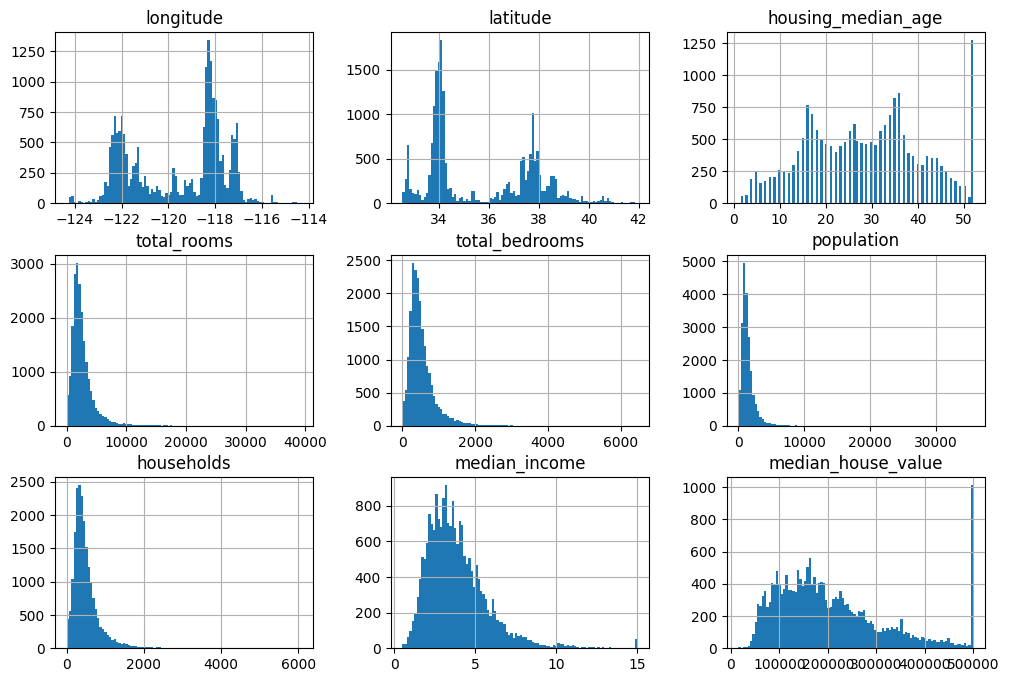

In [10]:
import matplotlib.pyplot as plt

housing.hist(bins=100, figsize=(12, 8))
plt.show()

## Create test set

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    suffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = suffled_indices[:test_set_size]
    train_indices = suffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3253 to 2128
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [13]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 14486 to 10023
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4082 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [14]:
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
len(housing) == len(train_set) + len(test_set)

True

In [17]:
np.random.permutation(len(housing))

array([11199, 19879, 18753, ..., 15655, 11373,  9860])

In [18]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < (test_ratio * 2**32)

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    # in_test_set will contain True for which the lambda function returns True; False otherwise.
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))

    # First: training set; Second: test set.
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing["total_rooms"]

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [20]:
housing["total_rooms"].apply(lambda id_: id_ < 1000)

0         True
1        False
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: total_rooms, Length: 20640, dtype: bool

In [21]:
# Add 'index' as first column
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [22]:
len(train_set)

16512

In [23]:
len(test_set)

4128

In [24]:
len(housing) == len(housing_with_id) and len(housing) == (len(train_set) + len(test_set))

True

In [25]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

## Using scikit-learn

In [26]:
# Split train/test set using scikit-learn. Should work essentially as shuffle_and_split_data()
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [27]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


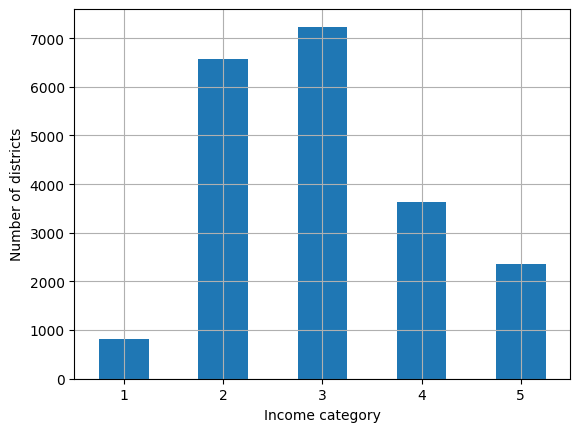

In [28]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

## Do stratified sampling

As the purpose of the model is to predict median income from a block group (district), we should split the training and test set into representative groups (stratified sampling, as explained in page 58).

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

# Creates 10 different stratified splits
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
# split() only return the indices (in this case, an array of 10 elements (the splits), and each element has an array of the shuffle indices of housing).
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # For each split, append the actual data (using iloc[]).
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [30]:
strat_splits[0][0] # Train set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


In [31]:
strat_splits[0][1] # Test set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN,5
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN,4
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN,3
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN,3
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN,2
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,2
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN,4
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY,4


In [32]:
len(housing) == (len(strat_splits[0][0]) + len(strat_splits[0][1]))

True

In [33]:
strat_train_set, strat_test_set = strat_splits[0]

In [34]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


### Easy way (stratified sampling is faily common)

This works to get 1 split.

In [35]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

# 3. Explore and Visualize the Data to Gain Insights

In [36]:
# This could be a portion of the data in case there are too much to work with while experimenting.
housing = strat_train_set.copy()

In [37]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN,3


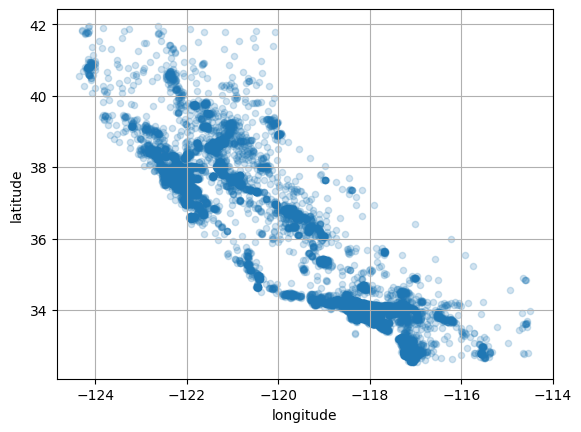

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2) # Setting the alpha to see where the data concentrates the most.
plt.show()

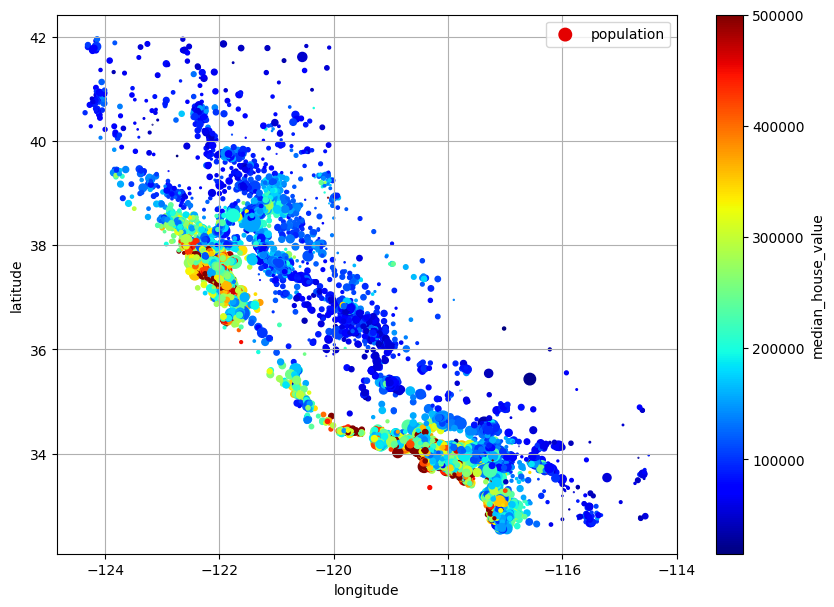

In [39]:
# s: Each circle radius
# c: Color is given by the price
# cmap: Color map to use
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))
plt.show()

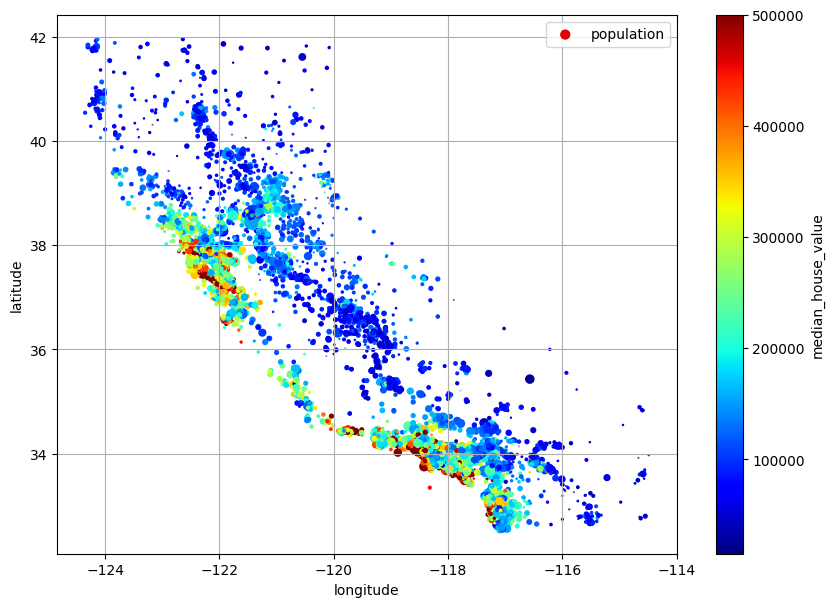

In [40]:
# s: Each circle radius
# c: Color is given by the price
# cmap: Color map to use
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 200, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, figsize=(10, 7))
plt.show()

## Correlations

In [41]:
# Compute standard correlation coefficient (also called Pearson's r)
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()

/tmp/ipykernel_682/1248820995.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.drop("ocean_proximity", axis=1).corr()


In [42]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [43]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

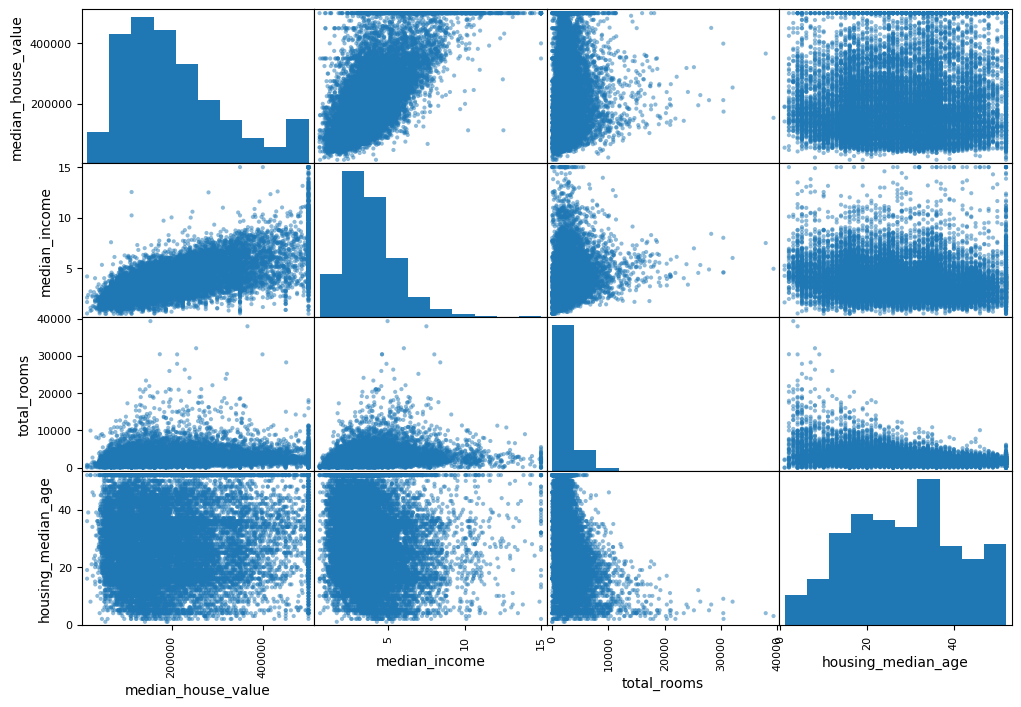

In [44]:
# Using scatter_matrix from Pandas
from pandas.plotting import scatter_matrix

# Use the top 4 attributes from the previous block (corr_matrix)
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

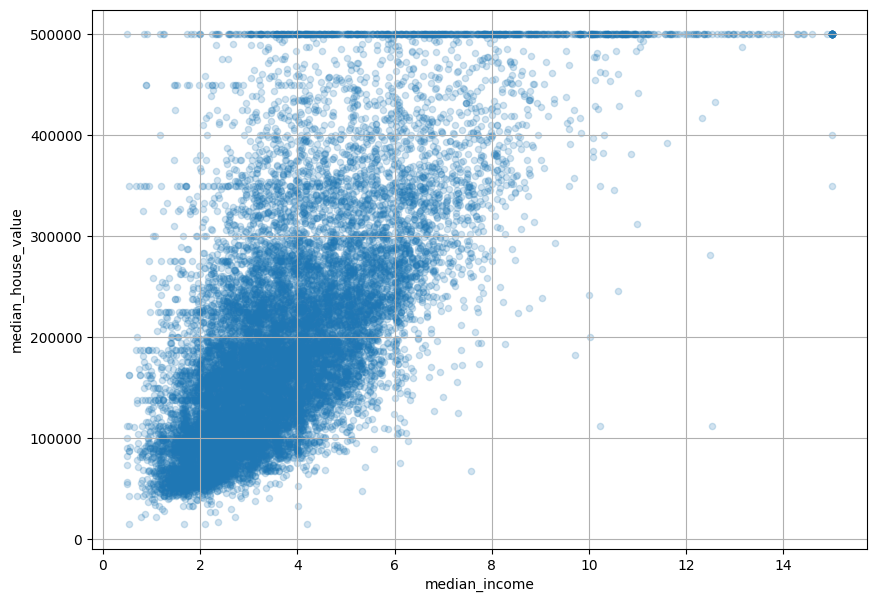

In [45]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", grid=True, figsize=(10, 7), alpha=0.2)
plt.show()

### Continue exploring on new attributes

In [46]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [47]:
corr_matrix = housing.drop("ocean_proximity", axis=1).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

/tmp/ipykernel_682/3989818298.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.drop("ocean_proximity", axis=1).corr()


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [48]:
# Base on this, houses with less bedrooms tend to be more expensive.

# 4. Prepare the Data for Machine Learning Algorithms

In [49]:
# Separate the predictors from the target value (median_house_value)
housing_original = housing.copy()
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [50]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


In [51]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [52]:
# Fill missing values with the median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [53]:
# The median can only be computed on numberical attributes.
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [54]:
# Execute the imputer based on the strategy (in this case, median)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [55]:
# The values are stored in the public variable statistics_
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [56]:
housing_num.median() # This match with the imputer's result

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [57]:
# Fill the missing values with the median
X = imputer.transform(housing_num)

# The problem is that the result of transformers are NumPy arrays (no headers nor indices)...
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [58]:
# ... so it needs to be converted to Pandas' DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [59]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [60]:
housing_tr.info() # Now total_bedrooms has no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [61]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [62]:
# Categories
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
dtype: int64

In [63]:
# It's better to work with numbers, so let's assign a value to the categories:
from sklearn.preprocessing import OrdinalEncoder

# The OrdinalEncoder just assign an ordinal number when encouter a new value
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [64]:
# Populated by fit() (executed by fit_transform())
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
# If assigning ordered values to categories is an issue (like there is no correlation between values), one-hot encoding could be used.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
housing_cat_1hot.toarray() # To get the sparse matrix as a NumPy array

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [67]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [68]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [69]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [70]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


## Feature Scaling and Transformation

In [71]:
# Min-max scaling (also called normalization, i.e. adjust the values to be in the range 0-1).
from sklearn.preprocessing import MinMaxScaler

# Accoding to the book, neural networks work better with values in the range from -1 to 1.
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [72]:
housing_min_max = pd.DataFrame(housing_num_min_max_scaled, columns=housing_num.columns, index=housing_num.index)
housing_min_max

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-0.608519,0.117021,1.000000,-0.831171,-0.641166,-0.807018,-0.614336,-0.779479
14973,0.210953,-0.661702,0.529412,-0.900148,-0.886294,-0.918660,-0.867090,-0.229293
3785,-0.519270,0.236170,0.254902,-0.945012,-0.930424,-0.931419,-0.924585,-0.733369
14689,0.468560,-0.744681,-0.372549,-0.787782,-0.726204,-0.774015,-0.709166,-0.756983
20507,0.257606,-0.740426,0.372549,-0.778015,-0.610243,-0.765796,-0.562815,-0.582171
...,...,...,...,...,...,...,...,...
14207,0.206897,-0.721277,0.568627,-0.886312,-0.808021,-0.885290,-0.805115,-0.419236
13105,0.022312,-0.197872,-0.137255,-0.850298,-0.809631,-0.826279,-0.801755,-0.714018
19301,0.478702,-0.991489,-0.529412,-0.800702,-0.750684,-0.655134,-0.716632,-0.508738
19121,0.206897,-0.678723,0.411765,-0.807773,-0.719117,-0.788738,-0.687512,-0.497166


In [73]:
# Standardization
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_num_standard_scaled = standard_scaler.fit_transform(housing_num)
housing_num_standard_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

In [74]:
housing_standard = pd.DataFrame(housing_num_standard_scaled, columns=housing_num.columns, index=housing_num.index)
housing_standard

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.359094,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.436356,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.759584,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.736231,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.585590,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.136961,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.125165,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.556922,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.788136,0.273563,0.882868,0.145396


In [75]:
# Gaussian Radial Basis Function (RBF)
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [76]:
housing_labels.to_frame()

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0
...,...
14207,500001.0
13105,88800.0
19301,148800.0
19121,500001.0


### Transforming target values

In [77]:
some_new_data = housing[["median_income"]].iloc[:5] # Pretend this is new data to be used for prediction


from sklearn.linear_model import LinearRegression

# 1. Scale the target values (labels)
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# 2. Apply the model (predict)
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels) # For simplicity, just train using the median_income

# 3. Predict values and transform back to get the original values (untransform)
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [78]:
# Same as before but much more compact
from sklearn.compose import TransformedTargetRegressor

# Embed the model and scaler
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

## Custom transformers

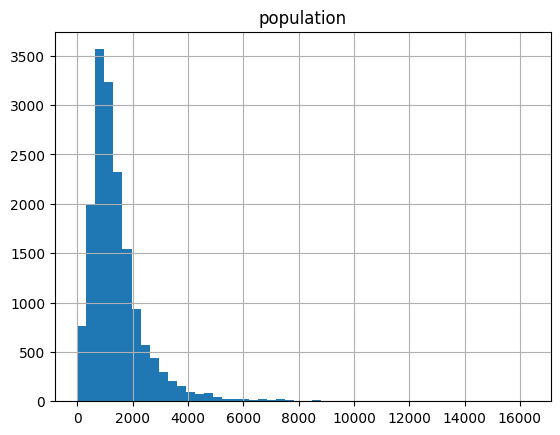

In [79]:
housing[["population"]].hist(bins=50)
plt.show()

In [80]:
# Replace the population with their logarithm to make it more bell-shape.
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


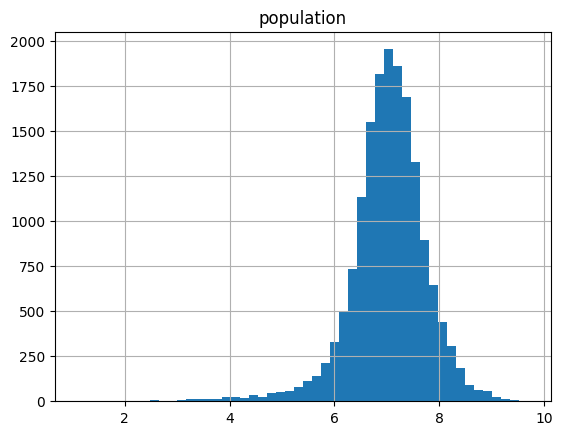

In [81]:
log_pop.hist(bins=50)
plt.show()

In [82]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

### Hand-write StandardScaler

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

# BaseEstimator adds get_params() and set_params().
# TransformerMixin adds fit_transform (but could the just hard-coded but calling fit() and transform()).
class StandardScalerClone(BaseEstimator, TransformerMixin):
    # no *args or **kwargs!
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    # y is required even though we don't use it
    def fit(self, X, y=None):
        X = check_array(X) # Checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0) # The standard deviation
        self.n_features_in_ = X.shape[1] # Every estimator stores this in fit()

        return self # Always return self!

    def transform(self, X):
        check_is_fitted(self) # Looks for learned attributes (with trailing _).
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if (self.with_mean):
            X = X - self.mean_

        return X / self.scale_

In [84]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(housing_num[["housing_median_age"]])

array([[ 1.86111875],
       [ 0.90762971],
       [ 0.35142777],
       ...,
       [-1.23772062],
       [ 0.66925745],
       [ 1.22545939]])

In [85]:
standard_scaler_clone = StandardScalerClone()
standard_scaler_clone.fit_transform(housing_num[["housing_median_age"]])

array([[ 1.86111875],
       [ 0.90762971],
       [ 0.35142777],
       ...,
       [-1.23772062],
       [ 0.66925745],
       [ 1.22545939]])

In [86]:
housing_num[["housing_median_age"]]

,housing_median_age
13096,52.0
14973,40.0
3785,33.0
14689,17.0
20507,36.0
...,...
14207,41.0
13105,23.0
19301,13.0
19121,37.0


In [87]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):

    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)
similarities

array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]])

In [88]:
cluster_simil.get_feature_names_out()

['Cluster 0 similarity',
 'Cluster 1 similarity',
 'Cluster 2 similarity',
 'Cluster 3 similarity',
 'Cluster 4 similarity',
 'Cluster 5 similarity',
 'Cluster 6 similarity',
 'Cluster 7 similarity',
 'Cluster 8 similarity',
 'Cluster 9 similarity']

## Transformation Pipelines

In [89]:
import sklearn

sklearn.set_config(display="diagram")

In [90]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [91]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [92]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [93]:
# Up to this point, the categories and numerical attributes had been have worked separately.
# We can group them into a ColumnTransformer to keep them together.
from sklearn.compose import ColumnTransformer

num_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attributes = ["ocean_proximity"]

# First create a pipeline for the categories
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", cat_pipeline, cat_attributes),
])

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [94]:
# The same as above, but not listing the column names (features) nor the stage name.
from sklearn.compose import make_column_selector, make_column_transformer

# preprocessing = make_column_transformer(
#     (num_pipeline, make_column_selector(dtype_include=np.number)),
#     (cat_pipeline, make_column_selector(dtype_include=object)),
# )
preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efa97c52260>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efa97911750>)])

In [95]:
housing_prepared = preprocessing.fit_transform(housing)
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out())
df_housing_prepared

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [96]:
from sklearn.pipeline import make_pipeline

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler(),
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one"),
    StandardScaler(),
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
)


# The ratios is for creating these features:
# housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
# housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
# housing["people_per_house"] = housing["population"] / housing["households"]

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], 
remainder=default_num_pipeline # One column remaining: housing_median_age
)

preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x7efa979516c0>,
                                                                      func=<function column_ratio...
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('geo', ClusterSimilarity(random_state=42),
                                 ['latitude', 'longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])

In [97]:
housing_prepared = preprocessing.fit_transform(housing)
df_housing_prepared = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out())
df_housing_prepared

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,geo__Cluster 7 similarity,geo__Cluster 8 similarity,geo__Cluster 9 similarity,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,remainder__housing_median_age,remainder__income_cat
0,1.846624,-0.866027,-0.330204,1.324114,0.637892,0.456906,1.310369,-1.071522,4.581829e-01,1.241847e-14,...,9.770322e-01,2.382191e-08,3.819126e-18,0.0,0.0,0.0,1.0,0.0,1.861119,-0.954687
1,-0.508121,0.024550,-0.253616,-0.252671,-0.063576,-0.711654,-0.142030,1.194712,6.511495e-10,9.579596e-01,...,1.260964e-13,1.103491e-01,3.547610e-01,1.0,0.0,0.0,0.0,0.0,0.907630,1.890078
2,-0.202155,-0.041193,-0.051041,-0.925266,-0.859927,-0.941997,-0.913030,-0.756981,3.432506e-01,4.261141e-15,...,7.303265e-01,2.508224e-08,2.669659e-18,0.0,1.0,0.0,0.0,0.0,0.351428,-0.954687
3,-0.149006,-0.034858,-0.141475,0.952773,0.943475,0.670700,0.925373,-0.912253,2.244844e-15,2.704823e-01,...,5.201263e-20,1.712982e-03,8.874598e-01,0.0,1.0,0.0,0.0,0.0,-0.919891,-0.954687
4,0.963208,-0.666554,-0.306148,1.437622,1.003590,0.719093,1.481464,0.034537,1.090228e-11,9.422206e-01,...,1.048030e-15,2.568824e-02,5.279506e-01,0.0,0.0,0.0,0.0,1.0,0.589800,-0.006432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.804368,-0.452111,-0.269780,0.465581,0.109720,-0.247054,0.379471,0.648953,1.115293e-10,9.505920e-01,...,1.651285e-14,4.776856e-02,3.463930e-01,1.0,0.0,0.0,0.0,0.0,0.987087,0.941823
16508,-0.192328,0.036792,-0.073741,0.454022,0.477277,0.314542,0.402773,-0.637675,1.409886e-03,1.430917e-03,...,9.538119e-06,4.530237e-01,9.507766e-05,0.0,1.0,0.0,0.0,0.0,-0.443146,-0.954687
16509,-0.242492,-0.109987,0.158542,0.824206,0.859552,1.243381,0.889897,0.333540,8.098794e-20,3.501819e-02,...,5.158970e-25,5.966953e-06,1.346576e-01,0.0,0.0,0.0,0.0,1.0,-1.237721,-0.006432
16510,0.259775,-0.360937,-0.210332,0.987851,0.811293,0.579462,1.023329,0.377051,4.385614e-10,9.667073e-01,...,8.018690e-14,8.956217e-02,3.478114e-01,1.0,0.0,0.0,0.0,0.0,0.669257,-0.006432


In [98]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

# 5. Select and Train a Model

## Using Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ef...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                ('linearregression', LinearRegression())])

In [100]:
# Using the same data used for training to predict, to see how far off the predictions are.
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([250400., 395000., 127400.,  87900., 332800.])

In [101]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [102]:
# Just looking at the predict vs actual values we can see the predicted ones are far off, but by how much?
# Compute the cost function RMSE

from sklearn.metrics import root_mean_squared_error
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68300.8872739978

## Use a more powerful model: Decision Tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ef...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [104]:
housing_predictions = tree_reg.predict(housing)
housing_predictions[:5].round(-2)

array([458300., 483800., 101700.,  96100., 361800.])

In [105]:
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

In [106]:
# If it's 0 means the model over-over-overfit the data.
# Use cross-validation to train the model with a portion of the training data and use the remaining as the validation set.
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
tree_rmses

array([64886.93509888, 65968.07258093, 67478.3344545 , 66565.58668701,
       64687.84859385, 67650.26223375, 67554.12324632, 69368.08602122,
       71011.07601759, 66989.93274882])

In [107]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67216.025768
std       1922.191058
min      64687.848594
25%      66117.451107
50%      67234.133602
75%      67626.227487
max      71011.076018
dtype: float64

## Use a more powerful model: Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
forest_rmses

array([46805.52813327, 47255.11902525, 45495.65229076, 46636.48831609,
       46095.68536621, 47551.90641897, 47700.57580019, 49311.1411067 ,
       47237.79362711, 47241.70465539])

In [109]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47133.159474
std       1021.454606
min      45495.652291
25%      46678.748270
50%      47239.749141
75%      47477.709571
max      49311.141107
dtype: float64

# 6. Fine-Tune Your Model (find the best combination of hyperparameters)

In [110]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# The combination of hyperparameters to use.
param_grid = [
    # 3x3 = 9 combinations
    {
        "preprocessing__geo__n_clusters": [5, 8, 10],
        "random_forest__max_features": [4, 6, 8],
    },
    # 2x3 = 6 combinations
    {
        "preprocessing__geo__n_clusters": [10, 15],
        "random_forest__max_features": [6, 8, 10],
    },
]

# 9 + 6 = 15 combinations
# cv = 3 -> 15x3 = 45 rounds of training!
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [111]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [112]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.473824,0.025119,0.082546,0.000571,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-44144.642244,-44681.841073,-45305.615303,-44710.699540,474.404342,1
13,4.436260,0.037729,0.084727,0.002176,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44838.628611,-45097.080235,-45660.869993,-45198.859613,343.306961,2
14,5.450252,0.021949,0.084057,0.002225,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-45127.175219,-45262.701113,-46049.787163,-45479.887832,406.760169,3
7,3.319925,0.016813,0.081802,0.001519,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-45305.532464,-46029.812843,-46496.776569,-45944.040625,490.090661,4
9,3.380079,0.036961,0.083872,0.000334,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-45305.532464,-46029.812843,-46496.776569,-45944.040625,490.090661,4
6,2.419259,0.030285,0.083361,0.000819,10,4,"{'preprocessing__geo__n_clusters': 10, 'random...",-45389.298529,-45989.378693,-46978.708070,-46119.128431,655.327866,6
8,4.287336,0.040053,0.083349,0.002360,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45805.974158,-46191.972759,-46573.651527,-46190.532815,313.404628,7
10,4.291645,0.037424,0.082931,0.000345,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-45805.974158,-46191.972759,-46573.651527,-46190.532815,313.404628,7
11,5.221261,0.031500,0.083309,0.002517,10,10,"{'preprocessing__geo__n_clusters': 10, 'random...",-46158.848064,-46319.528961,-47005.282111,-46494.553045,367.049244,9
4,3.310123,0.013449,0.084391,0.002068,8,6,"{'preprocessing__geo__n_clusters': 8, 'random_...",-46466.590700,-46487.268409,-46898.446973,-46617.435361,198.884450,10


## Retraining

In [113]:
# As the best combination was using n_clusters = 15 (the max value provided), here we're going to test another values.

param_grid = [
    {
        "preprocessing__geo__n_clusters": [15, 16, 17, 18],
        "random_forest__max_features": [2, 3, 4, 5, 6],
    },
]

# 9 + 6 = 15 combinations
# cv = 3 -> 15x3 = 45 rounds of training!
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring="neg_root_mean_squared_error")
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [15, 16, 17, 18],
                          'random_forest__max_features': [2, 3, 4, 5, 6]}],
             scoring='neg_root_mean_squared_error')

In [114]:
grid_search.best_params_
# As 18 is the max value in the previous params, we could trying to increase the value and re-train

{'preprocessing__geo__n_clusters': 18, 'random_forest__max_features': 4}

In [115]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,2.632770,0.015980,0.087390,0.000954,18,4,"{'preprocessing__geo__n_clusters': 18, 'random...",-43362.361014,-44300.756086,-44886.987997,-44183.368366,627.936710,1
18,3.045699,0.013091,0.087009,0.000753,18,5,"{'preprocessing__geo__n_clusters': 18, 'random...",-43639.061113,-44469.476940,-44707.341546,-44271.959866,457.941420,2
12,2.538660,0.007132,0.083220,0.000944,17,4,"{'preprocessing__geo__n_clusters': 17, 'random...",-43403.174093,-44386.179048,-45026.868010,-44272.073717,667.762685,3
13,3.060890,0.009671,0.085746,0.001264,17,5,"{'preprocessing__geo__n_clusters': 17, 'random...",-43682.679780,-44342.582928,-44881.116089,-44302.126266,490.095197,4
19,3.464713,0.016271,0.083343,0.001865,18,6,"{'preprocessing__geo__n_clusters': 18, 'random...",-43676.627954,-44444.859372,-44796.254951,-44305.914093,467.525754,5
14,3.503834,0.029693,0.084750,0.001626,17,6,"{'preprocessing__geo__n_clusters': 17, 'random...",-43713.791022,-44455.121376,-44962.392574,-44377.101657,512.716144,6
8,2.939630,0.067974,0.082747,0.002140,16,5,"{'preprocessing__geo__n_clusters': 16, 'random...",-43704.139910,-44406.896696,-45198.683045,-44436.573217,610.505429,7
7,2.525771,0.019351,0.083866,0.001860,16,4,"{'preprocessing__geo__n_clusters': 16, 'random...",-43558.356090,-44621.468978,-45266.575146,-44482.133405,704.302912,8
16,2.074458,0.012972,0.084392,0.001970,18,3,"{'preprocessing__geo__n_clusters': 18, 'random...",-43662.781251,-44438.119821,-45415.251944,-44505.384338,717.022440,9
2,2.552042,0.012526,0.084348,0.001550,15,4,"{'preprocessing__geo__n_clusters': 15, 'random...",-43927.980956,-44543.991533,-45397.570903,-44623.181131,602.565016,10


## Avoid manual parameters using RandomizedSearchCV

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# It's basically the same as GridSearchCV, but instead of receiving the possible values, it uses a distribution probability.
param_distribs = {
    "preprocessing__geo__n_clusters": randint(low=3, high=50),
    "random_forest__max_features": randint(low=2, high=20),
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42
)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efa97bc7970>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efa97bc5a20>},
                   random_state=42, scoring='neg_root_mean_squared_error')

## Analizing the best models

In [117]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.15, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.02, 0.01, 0.03, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.14])

In [118]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),
       reverse=True)
# The greater the value, more important.

[(0.14838866459853628, 'log__median_income'),
 (0.13781451371267514, 'remainder__income_cat'),
 (0.060181393505387246, 'cat__ocean_proximity_INLAND'),
 (0.0517085676481056, 'people_per_house__ratio'),
 (0.04766231777749664, 'bedrooms__ratio'),
 (0.03969419150738283, 'rooms_per_house__ratio'),
 (0.03377719122046225, 'geo__Cluster 30 similarity'),
 (0.02218884335756343, 'geo__Cluster 9 similarity'),
 (0.020789647605098844, 'geo__Cluster 36 similarity'),
 (0.019840664951323975, 'geo__Cluster 3 similarity'),
 (0.01792959770850853, 'geo__Cluster 18 similarity'),
 (0.01628591288739606, 'geo__Cluster 25 similarity'),
 (0.01609202387292049, 'geo__Cluster 32 similarity'),
 (0.015219937398710623, 'geo__Cluster 28 similarity'),
 (0.014371663053906608, 'geo__Cluster 1 similarity'),
 (0.013908104710464499, 'remainder__housing_median_age'),
 (0.013292430348975193, 'geo__Cluster 0 similarity'),
 (0.012750727053513669, 'geo__Cluster 26 similarity'),
 (0.011885025109810531, 'geo__Cluster 35 similarity'

## Evaluate on the test set

In [119]:
X_test = strat_test_set.drop("median_house_value", axis=1) # The values without the target values
y_test = strat_test_set["median_house_value"].copy() # The actual result values (current "y")

final_predictions = final_model.predict(X_test) # y-prediction (y-hat)

final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

42123.85189565645

In [120]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39967.17738678, 44175.36110535])

# 8. Launch, monitor and maintain your system

## Save the model

In [121]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

## Restore the model and use it

In [122]:
import joblib
# import the other things used in the model
# ...
final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = # Some new data to make predictions for
predictions = final_model_reloaded.predict(new_data)

SyntaxError: invalid syntax (2190752847.py, line 6)

# Exercises

## 1. Support Vector Machine

In [123]:
from sklearn.svm import SVR

# kernel="linear" -> c hyperparameter
# kernel="rbf"    -> c and gamma hyperparameter
# Use only the first 5000 records from the training set and CV=3

svm_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("SVR", SVR(kernel="linear", C=1.0)),
])
# svm_reg.fit(housing[:5000], housing_labels[:5000])
#svm_predictions = svm_reg.predict(housing[:5000])
#svm_rmse = root_mean_squared_error(housing_labels[:5000], svm_predictions)
#svm_rmse

svm_rmses = -cross_val_score(svm_reg, housing[:5000], housing_labels[:5000], scoring="neg_root_mean_squared_error", cv=3)
svm_rmses

array([117507.95990115, 119455.47404951, 113462.2576789 ])

In [124]:
pd.Series(svm_rmses).describe()

count         3.000000
mean     116808.563877
std        3057.208975
min      113462.257679
25%      115485.108790
50%      117507.959901
75%      118481.716975
max      119455.474050
dtype: float64

In [125]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    "preprocessing__geo__n_clusters": randint(low=3, high=50),
    "SVR__C": randint(low=1, high=20),
}

svm_rnd_search = RandomizedSearchCV(
    svm_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42
)
svm_rnd_search.fit(housing[:5000], housing_labels[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                                             ('SVR', SVR(kernel='linear'))]),
                   param_distributions={'SVR__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efb1ee930a0>,
                                        'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efb1ee931f0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [126]:
svm_rnd_search.best_params_

{'SVR__C': 15, 'preprocessing__geo__n_clusters': 45}

In [127]:
best_svm = svm_rnd_search.best_estimator_
svm_predictions = best_svm.predict(housing[:5000])
svm_rmse = root_mean_squared_error(housing_labels[:5000], svm_predictions)
svm_rmse

# Better RMSE, but worse than random forest

87135.95650227772

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

svm_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("SVR", SVR(kernel="rbf", C=1.0, gamma=1.0)),
])

param_distribs = {
    "preprocessing__geo__n_clusters": randint(low=3, high=50),
    "SVR__C": randint(low=1, high=20),
    "SVR__gamma": randint(low=1, high=20),
}


svm_rnd_search = RandomizedSearchCV(
    svm_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring="neg_root_mean_squared_error", random_state=42
)
svm_rnd_search.fit(housing[:5000], housing_labels[:5000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                   param_distributions={'SVR__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efad526b610>,
                                        'SVR__gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efad526bf40>,
                                        'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7efa99e6f460>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [129]:
svm_rnd_search.best_params_

{'SVR__C': 3, 'SVR__gamma': 2, 'preprocessing__geo__n_clusters': 26}

In [130]:
best_svm = svm_rnd_search.best_estimator_
svm_predictions = best_svm.predict(housing[:5000])
svm_rmse = root_mean_squared_error(housing_labels[:5000], svm_predictions)
svm_rmse

# Worst than linear

119768.70672299498

## 2. Replace GridSearchCV with RandomizedSearchCV

Done in "Avoid manual parameters using RandomizedSearchCV"

## 3. SelectFromModel transformer

In [131]:
from sklearn.feature_selection import SelectFromModel

selector_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("selector", SelectFromModel(RandomForestRegressor(random_state=42),
                                 threshold=0.005)), # min feature of importance
    ("svr", SVR(kernel="linear", C=svm_rnd_search.best_params_["SVR__C"])),
])

selector_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7efa979...
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7efa979137f0>)])),
                ('selector',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 threshold=0.005)),
                ('svr', SVR(C=3, kernel='linear'))])

In [132]:
svm_rmses = -cross_val_score(selector_pipeline, housing[:5000], housing_labels[:5000], scoring="neg_root_mean_squared_error", cv=3)
svm_rmses

array([115202.45424805, 117166.23462766, 111345.77530709])

In [133]:
pd.Series(svm_rmses).describe()

count         3.000000
mean     114571.488061
std        2961.085177
min      111345.775307
25%      113274.114778
50%      115202.454248
75%      116184.344438
max      117166.234628
dtype: float64

## 4. Create a custom k-nearest transformer

In [169]:
from sklearn.neighbors import KNeighborsRegressor

class MedianPriceNearestDistricts(BaseEstimator, TransformerMixin):

    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.kneighbors_regressor_ = KNeighborsRegressor(n_neighbors=self.n_neighbors, weights="distance")
        self.kneighbors_regressor_.fit(X, y)
        
        return self

    def transform(self, X):
        return self.kneighbors_regressor_.predict(X)

    def get_feature_names_out(self, names=None):
        return [f"K-nearest {i}" for i in range(self.n_neighbors)]

median_price = MedianPriceNearestDistricts(n_neighbors=5)
neigh_prices = median_price.fit_transform(housing[["latitude", "longitude"]], housing_labels)
neigh_prices

array([447500.6, 435250. , 105100. , ..., 148800. , 500001. , 237400. ])

In [142]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(housing[["latitude", "longitude"]], housing_labels)

KNeighborsRegressor()

In [162]:
neigh.predict(housing.loc[[2], ["latitude", "longitude"]])

array([415640.4])

In [165]:
housing.loc[[2], ["latitude", "longitude"]]

,latitude,longitude
2,37.85,-122.24
